In [128]:
#Import all of our necessary libraries

import os
import pandas as pd
import csv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [129]:
numCH = [None]*200
with open("Log-clusters.txt") as csv_file:
    data = list(csv.reader(csv_file, delimiter=','))
    count = 0
    for row in data:
        numCH[count] = len(row)
        count = count+1
        for i in range(0,len(row)):
            row[i] = int(row[i])

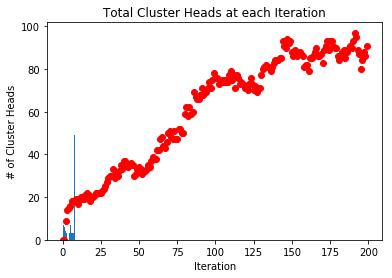

In [130]:
t = range(200)
plt.plot(t, numCH, 'ro')
plt.title("Total Cluster Heads at each Iteration")
plt.xlabel("Iteration")
plt.ylabel("# of Cluster Heads")
plt.show()

In [131]:
plt.figure()

def update_hist(num):
    plt.cla()
    plt.hist(data[num])
    plt.xlabel("Cluster Size")
    plt.ylabel("Frequency")
    plt.title("Cluster Sizes at T="+str(num))

fig = plt.figure()
hist = plt.hist(data[0])

In [132]:
num =0
animation = animation.FuncAnimation(fig, update_hist, 200, fargs=(num) )
HTML(animation.to_html5_video())

In [133]:
count = 0
for row in data:
    print(count,np.bincount(row))
    count = count+1

0 []
1 []
2 [2 5 1 1]
3 [3 3 2 3 3]
4 [2 1 3 3 2 2 1 1]
5 [1 3 1 1 1 4 1 2 2]
6 [2 2 0 3 1 3 2 2 3]
7 [2 2 1 0 1 2 2 1 7]
8 [1 3 1 0 1 0 2 1 9]
9 [ 2  2  2  0  1  0  0  0 12]
10 [ 0  2  1  0  1  0  0  0 13]
11 [ 3  0  1  1  1  0  0  0 13]
12 [ 3  0  0  2  1  1  0  0 13]
13 [ 2  0  1  0  1  1  0  0 14]
14 [ 1  1  1  0  1  1  0  0 14]
15 [ 1  1  2  1  0  1  1  0 14]
16 [ 1  1  3  0  0  1  0  1 15]
17 [ 1  1  1  0  0  1  1  0 16]
18 [ 0  0  1  0  1  0  0  2 14]
19 [ 0  0  2  1  0  1  0  0 16]
20 [ 0  1  0  2  0  0  0  0 17]
21 [ 0  2  1  1  0  0  0  1 16]
22 [ 1  1  1  0  0  0  1  1 17]
23 [ 1  1  2  0  0  0  1  0 17]
24 [ 1  1  0  3  0  0  0  0 17]
25 [ 0  1  3  1  0  0  0  0 17]
26 [ 1  1  1  2  1  0  0  0 17]
27 [ 1  1  1  2  1  0  2  0 16]
28 [ 3  1  1  0  1  2  0  1 16]
29 [ 2  2  2  0  0  1  2  1 17]
30 [ 2  3  0  1  2  1  2  1 17]
31 [ 3  2  1  1  1  3  1  0 18]
32 [ 3  2  1  1  1  2  1  1 18]
33 [ 7  3  2  1  0  2  1  0 17]
34 [ 3  3  0  2  0  2  2  0 17]
35 [ 3  3  1  2  0  1  2 

## 